In [1]:
# matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_DIR = Path('', 'data', 'final', 'public')

In [3]:
train_values = pd.read_csv('../TP1/train_values.csv', index_col='building_id')
train_labels = pd.read_csv('../TP1/train_labels.csv', index_col='building_id')
cleaned_train_labels = pd.read_csv( '../cleaned_train.csv')

In [4]:
train_values.dtypes

geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_cement_mortar_brick     int64
has_superstructure_t

<AxesSubplot:title={'center':'Number of Buildings with Each Damage Grade'}>

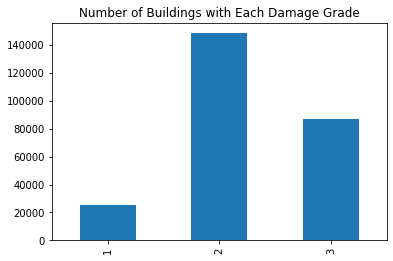

In [5]:
(train_labels.damage_grade
             .value_counts()
             .sort_index()
             .plot.bar(title="Number of Buildings with Each Damage Grade"))

In [6]:
selected_features = ['foundation_type', 
                     'area_percentage', 
                     'height_percentage',
                     'count_floors_pre_eq',
                     'land_surface_condition',
                     'has_superstructure_cement_mortar_stone']

train_values_subset = train_values[selected_features]

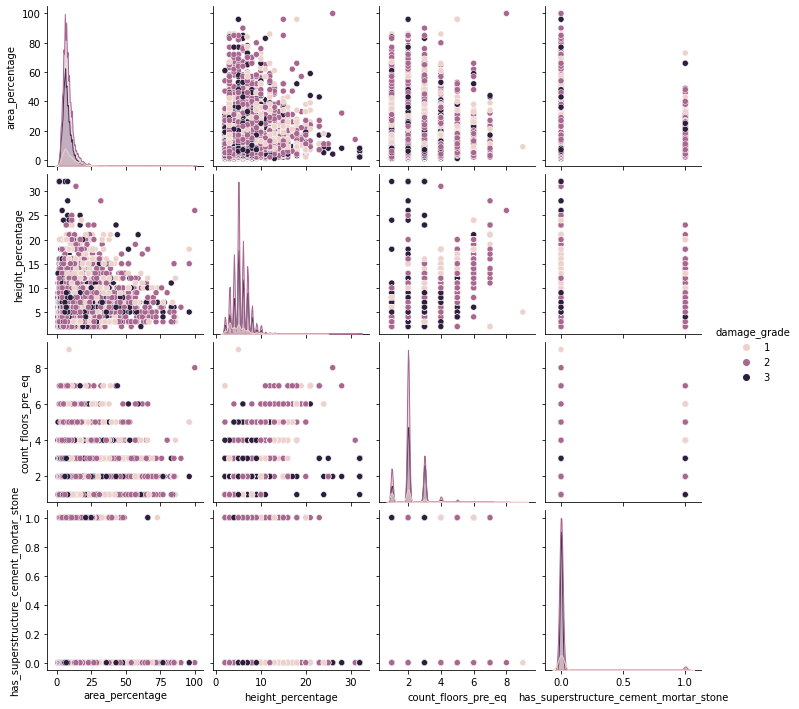

In [7]:
sns.pairplot(train_values_subset.join(train_labels), 
             hue='damage_grade')

In [19]:
train_values_subset = pd.get_dummies(train_values_subset)

In [9]:
# for preprocessing the data
from sklearn.preprocessing import StandardScaler

# the model
from sklearn.ensemble import RandomForestClassifier

# for combining the preprocess with model training
from sklearn.pipeline import make_pipeline

# for optimizing the hyperparameters of the pipeline
from sklearn.model_selection import GridSearchCV

In [10]:
pipe = make_pipeline(StandardScaler(), 
                     RandomForestClassifier(random_state=2018))
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=2018))])

In [11]:
param_grid = {'randomforestclassifier__n_estimators': [50, 100],
              'randomforestclassifier__min_samples_leaf': [1, 5]}
gs = GridSearchCV(pipe, param_grid, cv=5)

In [12]:
gs.fit(train_values_subset, train_labels.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=2018))]),
             param_grid={'randomforestclassifier__min_samples_leaf': [1, 5],
                         'randomforestclassifier__n_estimators': [50, 100]})

In [13]:
gs.best_params_

{'randomforestclassifier__min_samples_leaf': 5,
 'randomforestclassifier__n_estimators': 100}

In [14]:
from sklearn.metrics import f1_score

in_sample_preds = gs.predict(train_values_subset)
f1_score(train_labels, in_sample_preds, average='micro')

0.5894183061461775

# Predecir

In [28]:
train_values = pd.read_csv( '../TP1/train_values.csv', index_col='building_id')

In [32]:
train_values_subset = train_values[selected_features]
train_values_subset = pd.get_dummies(train_values_subset)

In [33]:
predictions = gs.predict(train_values_subset)
predictions

array([2, 2, 2, ..., 3, 2, 2])

In [34]:
df = pd.DataFrame(data=predictions, columns=['damage_grade'], index=train_values.index)
df.head(10)

,damage_grade
building_id,
802906,2
28830,2
94947,2
590882,2
201944,2
333020,2
728451,2
475515,2
441126,2


In [35]:
from sklearn.metrics import f1_score

train_labels = pd.read_csv( '../TP1/train_labels.csv', index_col='building_id')

f1_score(train_labels, predictions, average='micro')


0.5894183061461775